# Problem Statement

This dataset contains the prices and other attributes of almost 54,000 diamonds. Each row seems to represent a different diamond with various attributes such as carat, cut, color, clarity, measurements (x, y, z), depth, table, and price.

The main objective of this project is to define an ML model and predict a new price for diamonds with this model.

Evaluate the real price profit with the price predicted by the model.

Develop a simple application so that the user enters with new data and the ML model predicts the price  

# Import libraries


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format

In [98]:
# Read Dataset
df = pd.read_csv('diamonds.csv')

In [99]:
# Show data
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
95,96,0.70,Good,E,VS2,57.50,58.00,2759,5.85,5.90,3.38
96,97,0.70,Good,F,VS1,59.40,62.00,2759,5.71,5.76,3.40
97,98,0.96,Fair,F,SI2,66.30,62.00,2759,6.27,5.95,4.07
98,99,0.73,Very Good,E,SI1,61.60,59.00,2760,5.77,5.78,3.56


In [100]:
# Drop column Unnamed
df = df.drop('Unnamed: 0', axis= 1)

In [101]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [103]:
# All columns in dataset
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

# Select only categorical columns

In [104]:
# Select categorical column 
categoric_col = [i for i in df.columns if df[i].dtypes=='O']
print(categoric_col)

['cut', 'color', 'clarity']


In [105]:
# Print value counts for each categorical columns  
for i in categoric_col:
    print(df[i].value_counts())

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


I like to do this because in some cases the columns identified as object and may have missing values, such as a line with identification '?'(sign/symbol), and I would need to transform this line, but it is not the case here, everything is ok.

In [106]:
# Making a descritive analisys
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 53940  │ │ float64     │ 6     │                                                          │
│ │ Number of columns │ 10     │ │ string      │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA   ┃ NA %    ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p50    ┃ p75    ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ carat            │    0 │       0 │    0.8 │   0.47 │   0.2 │   0.4 │    0.7 │      1 │       5 │    ▇▃    │  │
│ │ depth            │    0 │       0 │     62 │    1.4 │    43 │    61 │     62 │     62 │      79 │     ▂▇   │  │
│ │ table            │    0 │       0 │     57 │    2.2 │    43 │    56 │     57 │     59 │      95 │    ▇▁    │  │
│ │ price            │    0 │       0 │   3900 │   4000 │   330 │   950 │   2400 │   5300 │   19000 │   ▇▃▁▁   │  │
│ │ x                │    0 │       0 │    5.7 │    1.1 │     0 │   4.7 │    5.7 │    6.5 │      11 │    ▇▇▂   │  │
│ │ y                │    0 │       0 │    5.7 │    1.1 │     0 │   4.7 │    5.7 │    6.5 │      59 │    ▇     │  │
│ │ z                │    0 │       0 │    3.5 │   0.71 │     0 │   2.9 │    3.5 │      4 │      32 │    ▇     │  │
│ └──────────────────┴──────┴─────────┴────────┴────────┴───────┴───────┴────────┴────────┴─────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ cut                       │       0 │          0 │                          1.2 │                    66022 │  │
│ │ color                     │       0 │          0 │                            1 │                    53940 │  │
│ │ clarity                   │       0 │          0 │                            1 │                    53940 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

# Converts the categorical data into numerical

In [107]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each column
for col in df[categoric_col]:
    df[col] = le.fit_transform(df[col])

In [108]:
df.dtypes

carat      float64
cut          int32
color        int32
clarity      int32
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [109]:
# Identify which correlation of other columns with price column 
correlation = df.corr()
print(correlation["price"].sort_values(ascending=False))

price      1.00
carat      0.92
x          0.88
y          0.87
z          0.86
color      0.17
table      0.13
cut        0.04
depth     -0.01
clarity   -0.07
Name: price, dtype: float64


**Carat:** With a correlation of 0.92, ‘carat’ has a strong positive correlation with ‘price’. This means that as the value of ‘carat’ increases, ‘price’ also tends to increase. This makes sense, as larger diamonds (higher carat) are generally more expensive.

**x, y, z:** The dimensions of the diamond (‘x’, ‘y’, and ‘z’) also have a strong positive correlation with ‘price’ (0.88, 0.87, and 0.86 respectively). This suggests that larger diamonds tend to be more expensive.

**Color:** ‘Color’ has a moderate positive correlation with ‘price’ (0.17). This may indicate that the color of the diamond has some impact on the price, although not as strong as carat or dimensions.

**Table:** ‘Table’ has a weak positive correlation with ‘price’ (0.13). This suggests that the width of the top of the diamond (the ‘table’) has a small impact on the price.

**Cut:** ‘Cut’ has a very weak correlation with ‘price’ (0.04). This suggests that the quality of the diamond’s cut has little impact on the price.

**Depth:** ‘Depth’ has an almost null correlation with ‘price’ (-0.01). This suggests that the total depth of the diamond (the ‘depth’) has little or no impact on the price.

**Clarity:** ‘Clarity’ has a weak negative correlation with ‘price’ (-0.07). This may indicate that diamonds with fewer imperfections (higher ‘clarity’) tend to be slightly less expensive, although the correlation is weak.

**Buuuut, NEVER FORGET, Correlation does not imply causality.**

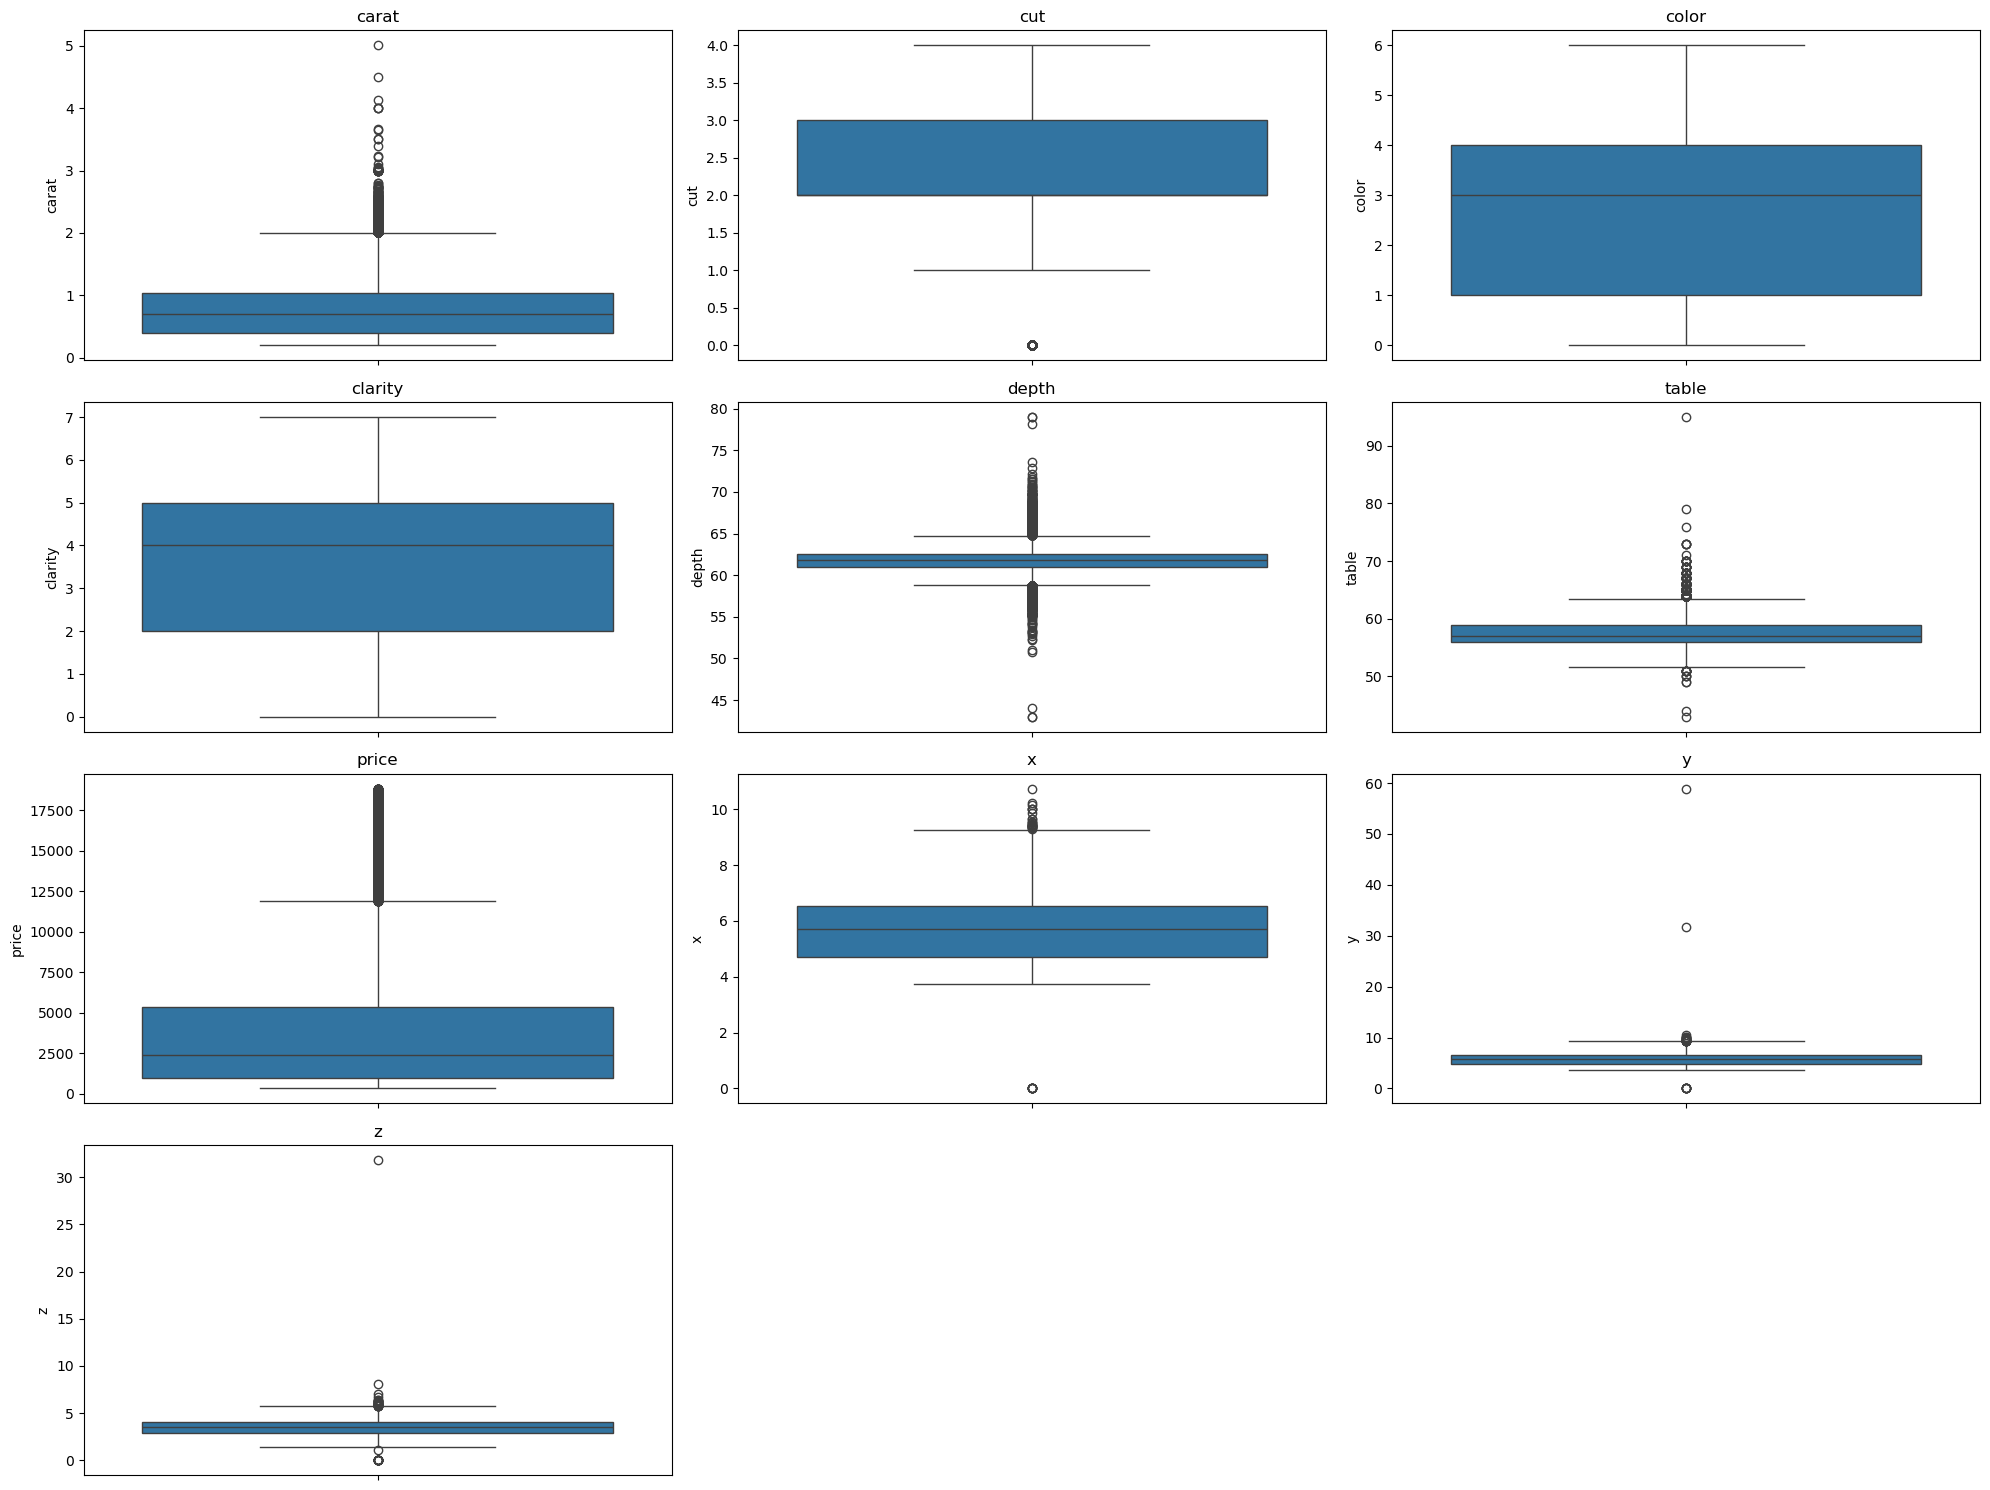

In [110]:
# Plotting boxplots for each column in the dataset
plt.figure(figsize=(20, 15))

# Create a boxplot for each column
for i, col in enumerate(list(df.columns)):
    plt.subplot(4, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

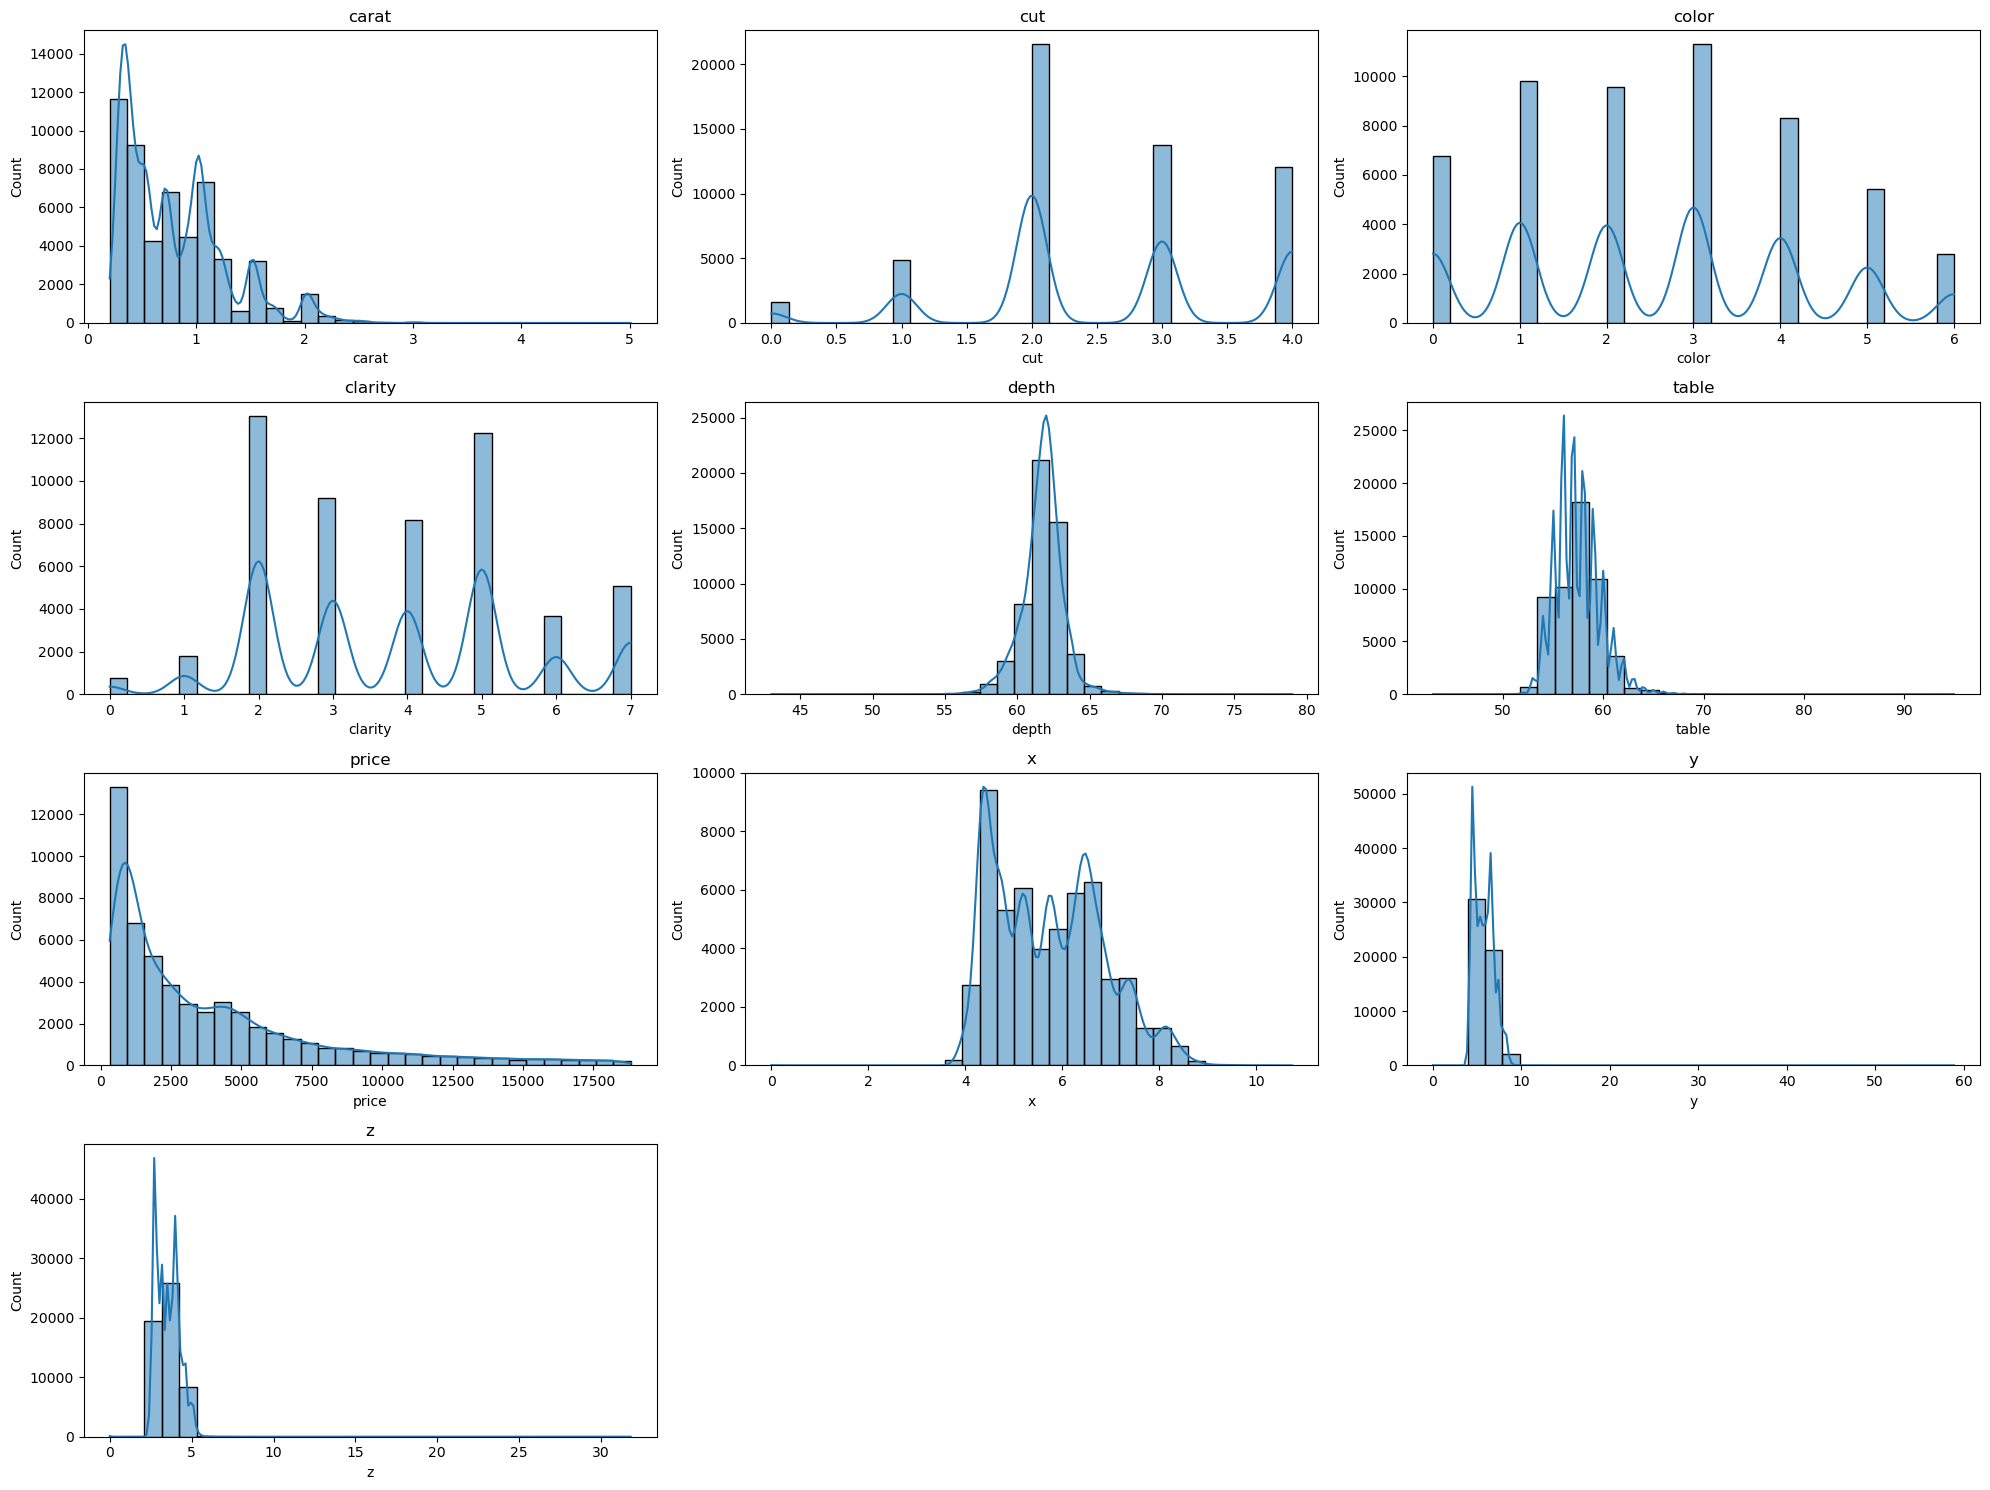

In [111]:
# Plotting histogram for each column in the dataset
plt.figure(figsize=(20, 15))

# Create a histogram for each column
for i, col in enumerate(list(df.columns)):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col],kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

# Split data into Train and Test

In [112]:
# Select Features and independent variable

X = df.drop('price', axis = 1)

y = df['price']

In [113]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Standardize data

In [114]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choosing the best model 

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR()
}

# Dictionary to hold the evaluation results
evaluation_results = {}

# Best model and metrics
best_model = None
best_mae = float('inf')
best_mse = float('inf')
best_r2 = float('-inf')

# Set, predict and evaluation each model
for model_name, model in regressors.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evaluation_results[model_name] = {'MAE': mae, 'MSE': mse, 'R2': r2}

    # Update the best model if that model is the best
    if mae < best_mae and mse < best_mse and r2 > best_r2:
        best_model = model_name
        best_mae = mae
        best_mse = mse
        best_r2 = r2

# Display the results of the evaluation
for model_name, metrics in evaluation_results.items():
    print(model_name + ':')
    for metric_name, metric_value in metrics.items():
        print(metric_name + ': ' + str(metric_value))
    print('--------------------------------------------------------')

print('Best model: ' + best_model)


Linear Regression:
MAE: 856.4083218261081
MSE: 1772260.3205072281
R2: 0.8863641648837631
--------------------------------------------------------
Decision Tree:
MAE: 364.2667779013719
MSE: 539079.326072179
R2: 0.965434688852833
--------------------------------------------------------
Random Forest:
MAE: 270.8020947606394
MSE: 293235.1931723966
R2: 0.9811980070444282
--------------------------------------------------------
Gradient Boosting:
MAE: 361.0442494844551
MSE: 432496.86972212425
R2: 0.9722686659474689
--------------------------------------------------------
SVR:
MAE: 1402.8661941126434
MSE: 7949135.392083876
R2: 0.4903081515288026
--------------------------------------------------------
Best model: Random Forest


# Train the best model with new datas

Now, I'll to train the real dataset with the best model, and we'll to calculate difference about real price less predict price.

In [116]:
model = regressors[best_model]
model.fit(X_train, y_train)

RandomForestRegressor()

In [117]:
y_pred = model.predict(X_test)

In [118]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE: ',mae)
print('MSE: ',mse)
print('R2: ',r2)

MAE:  270.6237678326203
MSE:  294771.2073229616
R2:  0.981099519114224


# Predict new Price with the Best Model 

In [119]:
# Copy the real dataframe
df1 = df.copy()

# Prepare the data
X = df1.drop('price', axis = 1)
X = scaler.transform(X)  # Using the same scaler that was previously trained

# Making predicts
df1['predict_model'] = model.predict(X)

In [120]:
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,predict_model
0,0.23,2,1,3,61.50,55.00,326,3.95,3.98,2.43,378.55
1,0.21,3,1,2,59.80,61.00,326,3.89,3.84,2.31,368.89
2,0.23,1,1,4,56.90,65.00,327,4.05,4.07,2.31,350.71
3,0.29,3,5,5,62.40,58.00,334,4.20,4.23,2.63,378.21
4,0.31,1,6,3,63.30,58.00,335,4.34,4.35,2.75,405.18
...,...,...,...,...,...,...,...,...,...,...,...
95,0.70,1,1,5,57.50,58.00,2759,5.85,5.90,3.38,"2,748.97"
96,0.70,1,2,4,59.40,62.00,2759,5.71,5.76,3.40,"2,892.62"
97,0.96,0,2,3,66.30,62.00,2759,6.27,5.95,4.07,"2,780.06"
98,0.73,4,1,2,61.60,59.00,2760,5.77,5.78,3.56,"2,682.59"


# Evaluating model

In [121]:
# Evaluating best model
mae = mean_absolute_error(df1['price'], df1['predict_model'])

mape = mean_absolute_percentage_error(df1['price'], df1['predict_model'])

print('mae:',mae)
print('mape:', mape*100)

mae: 152.8058451484895
mape: 3.6919229534691316


In [127]:
mean_real = df1.price.mean()
print('Mean real price:', mean_real)

Mean real price: 3932.799721913237


That means the mean error is 152,8 in relation about real price and this correspond 3,69% from real price.
Considering that mean real price are 3932,8; the value of evaluate mae is good and the porcenting is low.

# Revenue calculation

In [124]:
# calculate profit 
profit = df1.predict_model.sum() - df1.price.sum()
print('Profit:', profit)

Profit: 260665.11712697148


We can see that the total predicted value of diamonds by the model exceeds the actual price by a substantial amount, resulting in a profit of 260.665,12

# Develop an application - Input new features 

In [125]:
# Input new features

carat = float(input("Carat Size: "))
cut = int(input("Cut Type (Ideal: 0, Premium: 1, Good: 2, Very Good: 3, Fair: 4): "))
color = int(input("Color ( D:0,  E:1,  F:2,  G:3,  H:4,  I:5,  J:6): "))
clarity = int(input("Clarity (I1:0, IF:1, SI1:2, SI2:3, VS1:4, VS2:5, VVS1:6, VVS2:7): "))
depth = float(input("Depth Percent: "))
table = float(input("Table: "))
x_len = float(input("Length in mm: "))
y_wid = float(input("Width in mm: "))
z_dep = float(input("Depth in mm: "))

# Creat an array with new features
features = np.array([[carat, cut, color, clarity, depth, table, x_len, y_wid, z_dep]])

# Normalize the input datas
X = scaler.transform(features)

# Predict new values
price = model.predict(X)

# Print Diamont's Price
print("Predicted Diamond's Price = ", price[0])


Carat Size: 0.26
Cut Type (Ideal: 0, Premium: 1, Good: 2, Very Good: 3, Fair: 4): 1
Color ( D:0,  E:1,  F:2,  G:3,  H:4,  I:5,  J:6): 1
Clarity (I1:0, IF:1, SI1:2, SI2:3, VS1:4, VS2:5, VVS1:6, VVS2:7): 3
Depth Percent: 61.5
Table: 55
Length in mm: 3.95
Width in mm: 3.98
Depth in mm: 2.43
Predicted Diamond's Price =  400.82


# Conclusion

With based the main objectives about this project we conclusin:

- After the split, train and test some models, Random Forest was the choose.

- The total predicted value of diamonds by the model exceeds the actual price by a substantial amount, resulting in a profit of 260.665,12. This suggests that the model is performing well in overestimating the prices of diamonds, potentially leading to higher profits for diamond sellers 


- I maked a simple application that predict diamont price, I know that the aplication need some enhancements, for exemple:
    - Error Handling: Implement checks to ensure valid input formats and ranges for each feature.
    -  Descriptive Output: Include additional information, such as the predicted price range or confidence interval.
    - Visualization: Consider adding visualizations to showcase the relationship between different features and their impact on price.
    - Interactive Interface: Develop a user interface for a more interactive and user-friendly experience.
